In [1]:
import csv
import datetime as dt

def read_data():
    with open("example_data.csv") as csvfile:
        reader = csv.DictReader(csvfile)
        day_data = []
        time_data = []
        for row in reader:
            day_data.append(row["Day"])
            time_str = row["Time"][:2] + ":" + row["Time"][3:5]
            datetime_object = dt.datetime.strptime(time_str, "%H:%M")
            time_data.append(datetime_object)
    
    return day_data, time_data

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

day_pre_data, time_data = read_data()

day_data = []
for day in day_pre_data:
    day_str = day.split('.')
    year = int(day_str[2]) + 2000
    day_data.append(dt.datetime(year, int(day_str[1]), int(day_str[0])))
    
start_time = "00:00"
end_time = "23:59"
dtobj_start = dt.datetime.strptime(start_time, "%H:%M")
dtobj_end = dt.datetime.strptime(end_time, "%H:%M")
     
formatter = mpl.dates.DateFormatter('%d/%m/%y')

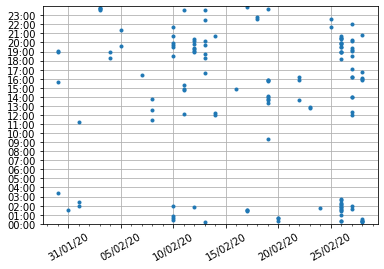

In [3]:
fig, ax = plt.subplots()
plt.plot_date(day_data, time_data, ".")
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(mpl.dates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mpl.dates.DayLocator(interval=5))
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.yaxis.set_major_locator(mpl.dates.HourLocator())
ax.yaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
plt.ylim(dtobj_start, dtobj_end)
plt.grid(True)
plt.show()